```prompt
プロンプト「
# あなた
あなたは機械学習手法のエキスパートです。

# 依頼
分類問題を行うCondtional GANプログラムをPythonで作ってください。
以下の事項を守ってください。

# Python packageの条件
pytorchを用いてください。
torchvisionを用いないでください。
GPUは用いません。CPUを用います。

# 問題設定
scikit-learnの手書き数字データセットの答えは0から9までの数字です。しかしこれらはラベルであり，10個のカテゴリ変数を持つ分類問題です。
サイズ10の一次元onehot vectorでこれらを表します。
Generatorは乱数に加えてonehot vectorを入力して画像を出力してください。
Discriminatorは画像を入力としてonehot vectorを出力してください。

# ニューラルネットワーク
ニューラルネットワークは各層で活性化関数を用いてください。
ニューラルネットワークの隠れ層は２層にしてください。
Discriminatorはdropoutを使ってください。
元画像が(8,8)のサイズであることを考慮してニューラルネットワークの隠れ層のノード数を決めてください。

# 訓練データ，テストデータ，新規データ
scikit-learnの手書き数字データセットを用います。
データセットはsklearn.datasets.digits関数で取得してください。
データセットの80％を訓練データ，20%をテストデータとします。

# 学習過程
学習中のGeneratorの画像を10表示してください。
学習中の損失関数をテキストで表示してください。

# 学習後
学習後に以下を行ってください。
学習中の損失関数を図示してください。縦軸はlogスケールとしてください。
訓練データ，テストデータ，新規データに対して分類評価を行い，accuracyとconfusion matrixを表示しくてださい。
」
```

上のプロンプトはほぼ完成形で、この形になるまでにプロンプトを修正しつつ何度もコード生成をさせています。
学習過程，学習後の図示は学習過程を表示するように途中でプロンプトに入れました．
（torchvisionを用いないのは私の環境ではインストールに問題が発生したからです．）

この過程で以下の誤りが多く出ました。

1. scikit-learnの手書き数字データセットの答えは0から9までの数字なので、依然として連続変数であるとして回帰問題を作成することが多くありました。
2. コードでは元data変数のピクセル値が0から16までであることを知っていて，16で割って0から1までの値になるように規格化を行っています。しかし、Generatorクラスにおいて各出力ノードが0から１までの値を出力するとして作成しせずに、-$\infty$から$\infty$までの値を持つ場合として生成する場合も多くありました。
3. ニューラルネットワークの構成がおかしいこともありました．
4. バッチ毎の損失関数を図示するのではなく，各バッチの最後のステップの損失関数を図示することがありました．


これらに対するプロンプトへの対応は以下です。

1. カテゴリ変数をニューラルネットワークの枠組みの載せる方法として幾つかあります。以下のコードのOneHotEncoder()がその手法の一つです。これを理解させるために、「これらはラベルであり，10個のカテゴリ変数を持つ分類問題です。」という指示を加えています。
2. 「生成器の出力は画像であり各ピクセルは0から1までの値を持ちます。」という文章をプロンプトに加えます。
3. ニューラルネットワークの入出力ユニットの数を図を参照して明確に記載する必要があります．
4. 例えば，「各バッチの全てのステップの損失関数の平均値を図示してください．」と記載します．

更に，こららが複合的に起き，生成器，識別器のどちらかが学習できない・過学習したこともありました．
これに対応させようとし，各Epochに対する識別器の損失関数（コード上のlosses_d）, 生成器の損失関数（losses_g）の履歴をプロンプトコピペし，妥当な画像が生成できない，と尋ねた場合は、単に収束の問題としての対応法の提示に終始し、上の問題の修正はできませんでした。

以下は上の事項を考慮しプロンプトを書き直しコードを生成させ，
アルゴリズムがおかしいい部分を人が修正し，
パラメタを容易に変更できるようにNUM_EPOCHSなど大文字のプログラム内で共通の定数を用いる等の修正を行ったコードです。
更に修正したほうが良いと思える部分もありますが，なるべくGPT4oのコードを変更しないでいます．



Epoch 10/100 - Loss D: 0.08834688365459442, Loss G: 0.32582053542137146


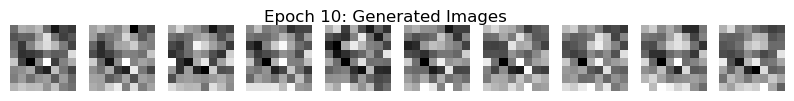

Epoch 20/100 - Loss D: 0.07442345470190048, Loss G: 0.31853049993515015


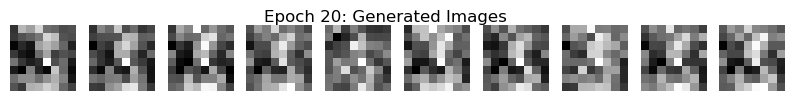

Epoch 30/100 - Loss D: 0.08608829975128174, Loss G: 0.29389381408691406


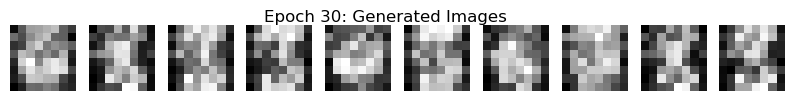

Epoch 40/100 - Loss D: 0.0731777548789978, Loss G: 0.26293259859085083


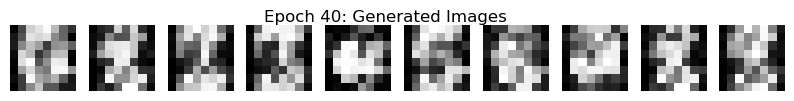

Epoch 50/100 - Loss D: 0.07095438241958618, Loss G: 0.248770609498024


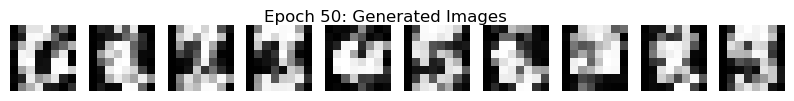

Epoch 60/100 - Loss D: 0.05897210165858269, Loss G: 0.23397384583950043


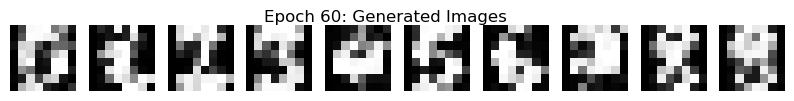

Epoch 70/100 - Loss D: 0.05785059183835983, Loss G: 0.22643190622329712


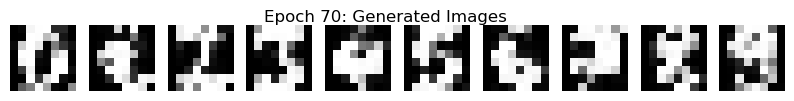

Epoch 80/100 - Loss D: 0.06164177879691124, Loss G: 0.22422336041927338


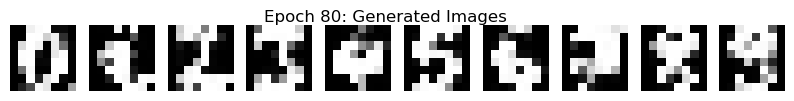

Epoch 90/100 - Loss D: 0.05506692826747894, Loss G: 0.23081457614898682


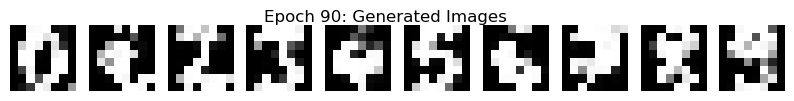

Epoch 100/100 - Loss D: 0.05518786981701851, Loss G: 0.23178498446941376


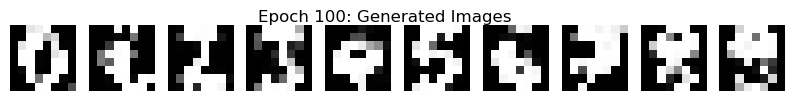

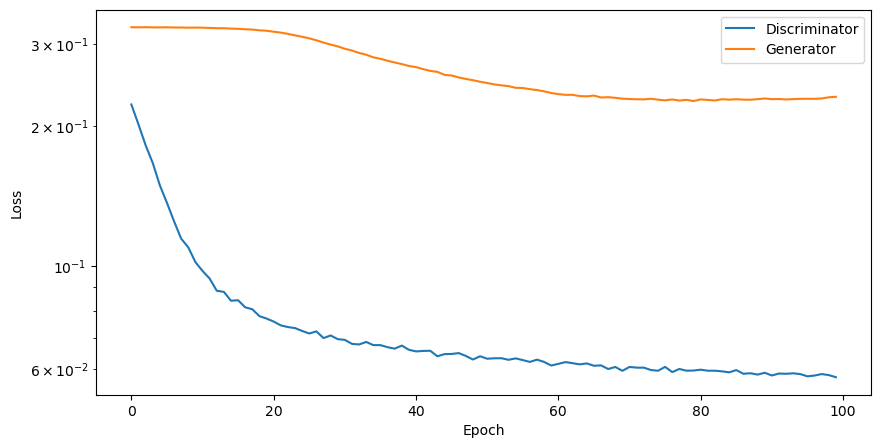

Train Accuracy: 0.9972164231036882
Test Accuracy: 0.9805555555555555
Train Confusion Matrix:
[[145   0   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   0   0   0]
 [  0   0 144   0   0   0   0   0   0   0]
 [  0   0   0 149   0   0   0   0   0   0]
 [  0   0   0   0 135   0   0   0   0   0]
 [  0   0   0   0   0 134   0   0   0   1]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 145   0   0]
 [  0   2   0   0   0   0   0   0 142   0]
 [  0   0   0   1   0   0   0   0   0 139]]
Test Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import os

from cgan_misc import show_generated_images, plot_losses

# パラメタ
NUM_EPOCHS = 100
EPOCHS_PER_DISPLAY = 10
BATCH_SIZE = 64

NOISE_DIM = 54
CATEGORY_DIM = 10
HIDDEN_DIM_A = 128
HIDDEN_DIM_B = 256

G_ACTION = 'SIMPLE_FC' # SIMPLE_FC or LABEL_EMBED
D_ACTION = 'SIMPLE_FC' # SIMPLE_FC or LABEL_EMBED

MODELS_DIR = "models"
# モデルの出力ディレクトリの作成
os.makedirs(MODELS_DIR, exist_ok=True)

# 手書き数字データセットをロード
digits = load_digits()
X = digits.images  # 画像データ (8,8)
y = digits.target  # ラベルデータ (0~9)

# データを(8, 8)から(64)に変換
IMAGE_DIM = 64 # このデータに対して64に固定
X = X.reshape(-1, IMAGE_DIM)

# onehotエンコーディング
onehot_encoder = OneHotEncoder(sparse_output=False)
# onehot_encoder = OneHotEncoder(sparce=False) 

# yをonehotエンコーディングに変換する．
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# 訓練データとテストデータに分割 (80%訓練、20%テスト)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# PyTorchのTensorに変換
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# データローダーの作成
train_data = data.TensorDataset(X_train, y_train)
test_data = data.TensorDataset(X_test, y_test)
train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Generatorの定義
if 'SIMPLE_FC' in G_ACTION:
    class Generator(nn.Module):
        def __init__(self, hidden_units1=HIDDEN_DIM_A, hidden_units2=HIDDEN_DIM_B):
            super(Generator, self).__init__()
            self.fc1 = nn.Linear(CATEGORY_DIM + NOISE_DIM, hidden_units1)  # onehot vector + random noise 
            self.fc2 = nn.Linear(hidden_units1, hidden_units2)
            self.fc3 = nn.Linear(hidden_units2, IMAGE_DIM)  # 出力は(8*8)
            self.relu = nn.ReLU()
    
        def forward(self, z, labels):
            x = torch.cat([z, labels], dim=1)
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = torch.sigmoid(self.fc3(x))  # 出力は0~1
            return x
            
elif 'LABEL_EMBED' in G_ACTION:
    class Generator(nn.Module):
        def __init__(self, latent_dim=NOISE_DIM, category_dim=CATEGORY_DIM, 
                     hidden_dim1=HIDDEN_DIM_A, hidden_dim2=HIDDEN_DIM_B, image_dim=IMAGE_DIM):
            super(Generator, self).__init__()
            self.label_emb = nn.Linear(category_dim, latent_dim)
            self.model = nn.Sequential(
                nn.Linear(latent_dim + latent_dim, hidden_dim1),  # 入力層
                nn.ReLU(True),
                nn.Linear(hidden_dim1, hidden_dim2),  # 中間層
                nn.ReLU(True),
                nn.Linear(hidden_dim2, image_dim),  # 出力層
                nn.Sigmoid() # 値を[0:1]にするためにTanhからSigmoidへ変更
            )

        def forward(self, noise, labels):
            label_embedding = self.label_emb(labels)
            gen_input = torch.cat((noise, label_embedding), -1)
            return self.model(gen_input)
        
# Discriminatorの定義
if 'SIMPLE_FC' in D_ACTION:
    class Discriminator(nn.Module):
        def __init__(self, hidden_units1=256, hidden_units2=128):
            super(Discriminator, self).__init__()
            self.fc1 = nn.Linear(IMAGE_DIM, hidden_units1)
            self.fc2 = nn.Linear(hidden_units1, hidden_units2)
            self.fc3 = nn.Linear(hidden_units2, CATEGORY_DIM)  # onehot vectorで10クラス
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(0.3)
            self.softmax = nn.Softmax(dim=1)
    
        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.dropout(x)
            x = self.relu(self.fc2(x))
            x = self.dropout(x)
            x = self.softmax(self.fc3(x))
            return x
            
elif 'LABEL_EMBED' in D_ACTION:
    class Discriminator(nn.Module):
        def __init__(self, latent_dim=IMAGE_DIM, category_dim=CATEGORY_DIM, hidden_dim1=HIDDEN_DIM_B, hidden_dim2=HIDDEN_DIM_A):
            super(Discriminator, self).__init__()
            self.label_emb = nn.Linear(category_dim, latent_dim)
            self.model = nn.Sequential(
                nn.Linear(latent_dim + latent_dim, hidden_dim1),  # 入力層
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(hidden_dim1, hidden_dim2),  # 中間層
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(hidden_dim2, category_dim)  # 出力層のノード数をcategory_dimに変更
            )
            self.softmax = nn.Softmax(dim=1)  # Softmaxで出力をone-hotベクトルに変換
    
        def forward(self, img, labels):
            label_embedding = self.label_emb(labels)
            d_in = torch.cat((img, label_embedding), -1)
            validity = self.model(d_in)
            return self.softmax(validity)  # Softmaxでone-hotベクトルに変換

# ランダムノイズを生成する関数
def generate_noise(batch_size, noise_dim, device):
    return torch.randn(batch_size, noise_dim).to(device)


# 学習プロセスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
# lr=0.0002
g_optimizer = optim.Adam(generator.parameters(), lr=0.0001)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0001)

# 学習ループ
losses_g = []
losses_d = []

epoches_saved = []
for epoch in range(1, NUM_EPOCHS + 1):
    batch_g_loss = []
    batch_d_loss = []
    for real_imgs, labels in train_loader:
        batch_size = real_imgs.size(0)
        real_imgs, labels = real_imgs.to(device), labels.to(device)

        # 本物ラベルと偽物ラベル（ここではone-hot形式を使用）
        valid = labels
        fake = torch.zeros_like(labels).to(device)  # 偽物画像のラベルをすべて0に
        
        # Discriminatorの学習
        d_optimizer.zero_grad()
        z = generate_noise(batch_size, NOISE_DIM, device)
        fake_imgs = generator(z, labels)
        if 'SIMPLE_FC' in D_ACTION:
            real_loss = criterion(discriminator(real_imgs), valid)
            fake_loss = criterion(discriminator(fake_imgs.detach()), fake)
        elif 'LABEL_EMBED' in D_ACTION:
            real_loss = criterion(discriminator(real_imgs, labels), valid)
            fake_loss = criterion(discriminator(fake_imgs.detach(), labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        batch_d_loss.append(d_loss.item())
        d_loss.backward()
        d_optimizer.step()
        
        # Generatorの学習
        g_optimizer.zero_grad()
        z = generate_noise(batch_size, NOISE_DIM, device)
        fake_imgs = generator(z, labels)
        if 'SIMPLE_FC' in D_ACTION:
            g_loss = criterion(discriminator(fake_imgs), labels)
        elif 'LABEL_EMBED' in D_ACTION:
            g_loss = criterion(discriminator(fake_imgs, labels), labels)
        batch_g_loss.append(g_loss.item())
        g_loss.backward()
        g_optimizer.step()
        
    # 損失を記録
    losses_g.append(np.array(batch_g_loss).mean())
    losses_d.append(np.array(batch_d_loss).mean())

    # 10エポックごとに画像を表示し、損失関数を表示
    if epoch % EPOCHS_PER_DISPLAY == 0:
        print(f"Epoch {epoch}/{NUM_EPOCHS} - Loss D: {d_loss.item()}, Loss G: {g_loss.item()}")
        z = generate_noise(10, NOISE_DIM, device)
        labels = torch.eye(10).to(device)  # 0から9までのonehot vector
        with torch.no_grad():
            generated_imgs = generator(z, labels).cpu().view(-1, 8, 8)        
        show_generated_images(generated_imgs, epoch)
        torch.save(generator.state_dict(), os.path.join(MODELS_DIR, f"generator_{epoch}.pth"))
        torch.save(discriminator.state_dict(), os.path.join(MODELS_DIR, f"discriminator_{epoch}.pth"))
        epoches_saved.append([epoch, losses_g[-1]])

plot_losses(losses_d, losses_g)

# 学習後の評価
generator.eval()
discriminator.eval()

# 訓練データ, テストデータでの評価
def evaluate(loader, model):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for imgs, labels in loader:
            labels, imgs = labels. to(device), imgs.to(device)
            if 'SIMPLE_FC' in D_ACTION:
                outputs = model(imgs)
            elif 'LABEL_EMBED' in D_ACTION:
                outputs = model(imgs, labels)
            preds = torch.argmax(outputs, dim=1)
            true_labels = torch.argmax(labels, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(true_labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, cm

train_accuracy, train_cm = evaluate(train_loader, discriminator)
test_accuracy, test_cm = evaluate(test_loader, discriminator)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Train Confusion Matrix:")
print(train_cm)

print("Test Confusion Matrix:")
print(test_cm)


エポック毎にモデルを保存しているので，最も生成器の損失関数が小さいエポックのモデルを読み出し，画像を生成します．

（以下のコードもGPT4oに生成させています．）

In [2]:
def find_min_epoch(epochs_saved):
    # 最も小さい第2番目の要素を持つタプルを見つける
    min_epoch = min(epochs_saved, key=lambda x: x[1])
    return min_epoch[0]
opt_epoch = find_min_epoch(epoches_saved)
print(f"use {opt_epoch}th epoch")

use 80th epoch


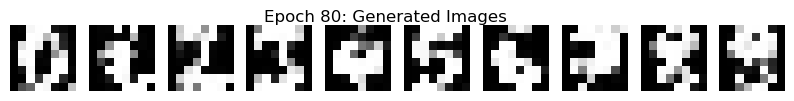

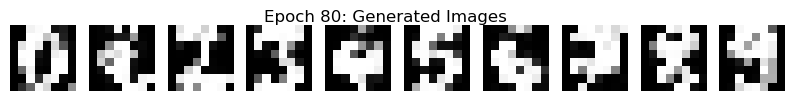

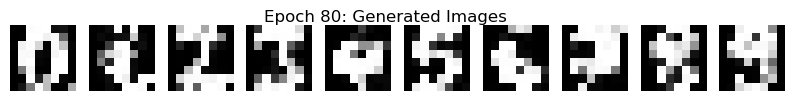

In [3]:
# モデルの初期化
generator = Generator().to(device)
# モデルの状態辞書を読み込み
generator.load_state_dict(torch.load(os.path.join(MODELS_DIR, f"generator_{opt_epoch}.pth"), weights_only=True))
# generator.load_state_dict(torch.load(f"models/generator_{min_epoch}.pth")) # weights_only=True may not work.
# 状態辞書を読み込んだらモデルを評価モードにする
generator.eval()
# ことなる乱数で画像を生成して表示
for _ in range(3):
    z = generate_noise(10, NOISE_DIM, device)
    labels = torch.eye(10).to(device)  # 0から9までのonehot vector
    with torch.no_grad():
        generated_imgs = generator(z, labels).cpu().view(-1, 8, 8)
    show_generated_images(generated_imgs, opt_epoch)

元画像より太い文字が多く，数字には見えない文字もあります．
例えば，９は元画像が上部と下部との繋がりが薄い画像が多く，それらを学習しているので学習自体は妥当でしょう．
それなりに数字に対応した文字が生成できたと思います．

data from 0 to 9


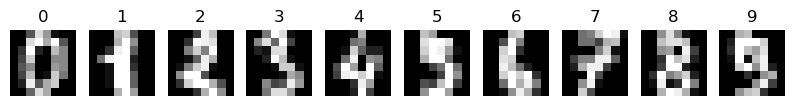

data from 100 to 109


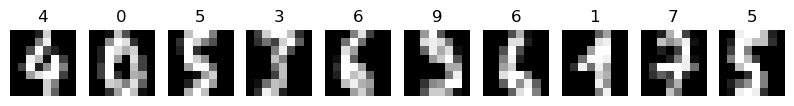

data from 200 to 209


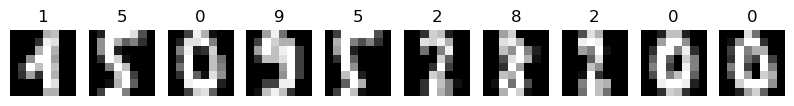

data from 300 to 309


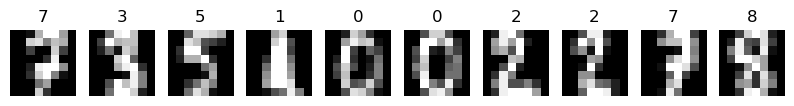

data from 400 to 409


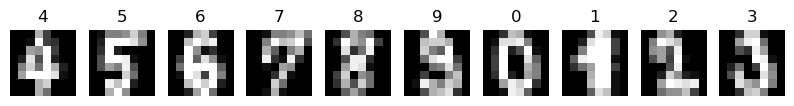

data from 500 to 509


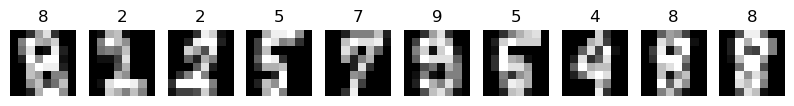

data from 600 to 609


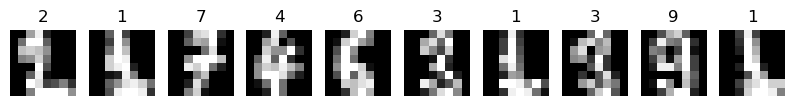

data from 700 to 709


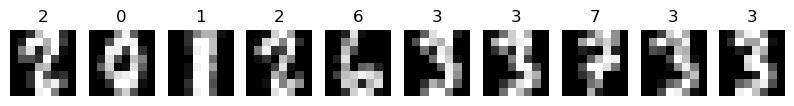

data from 800 to 809


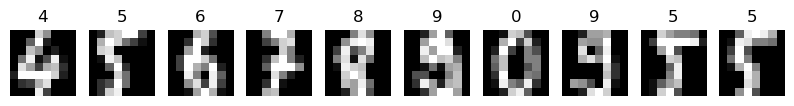

data from 900 to 909


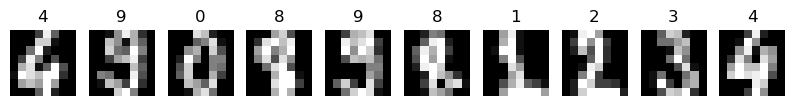

In [4]:
# 元画像の表示
from cgan_misc import show_original_images
for i in range(10):
    show_original_images(X, y, i*100)

ニューラルネットワークモデルを見ます．
生成器，識別器共に全結合ニューラルネットワークモデルが用いられています．

G_ACTION, D_ACTIONで生成器，識別器のクラスを選択するように私が書き直しています．GPT4oが生成したネットワークの変種として生成コード例として２種類選択できます．この二つは図で示すネットワークを持っています．
cGANでは識別器にラベルを含めるコードが多いと思いますが，識別器にラベルが含まれなくてもこの場合は妥当に生成器が学習できます．
![生成器と識別器の別途ワーク例](image_keep/CGAN_network.png)

図caption: 生成器と識別器の別途ワーク例．左：SIMPLE_FCとした場合．右：LABEL_EMBEDとした場合.

SIMPLE_FCではどちらも指定した通り２層の隠れ層を用いています．
それぞれのモデルはhidden_units1, hidden_units2のユニットを持っています．
また，Discriminatorでは依頼通りdropoutを用いています．
このあたりの詳細はコードをプロンプトに書きGPT4oに尋ねると詳しく説明してくれます．

今回プロンプトでOnehotEncoderの名前を挙げたので，GPT4oはOnehotEncoderを用いましたが
OnehotEncoderで数字ラベルを変換する替わりに


In [5]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

を用いています．これは0から9までの10個の数字をOnehotEncoderにより変換した結果と同じです．(ラベルを一度ソートしているので同じですが，将来は異なる順序になるかもしれません．）
同様に，torch.zeros_like(labels)はlabelsと同じ配列サイズで全要素が0の行列を作っています．

Discriminatorのoutputは長さCATEGORY_DIMのベクトルです．
outputは各ユニットは0-1までの値を取り，OvR分類と同様に最大の値を持つインデックスが予測ラベルとなります．
```
preds = torch.argmax(outputs, dim=1)
```

次に，最も重要な損失関数部分を見ていきます．
'SIMPLE_FC'だけを説明します．
GANの識別モデルは、実画像を「本物」として、生成モデルが生成した画像を「偽物」として識別するために訓練する，と説明されます．
最適化を行う何かの損失関数があるはずですが，'生成モデルが生成した画像を「偽物」として識別する'が実際に行うことは言語による説明だけでなく，
一般的な式を見ても初心者には理解が難しいでしょう．以下に示すようにコードの方が損失関数の理解が容易でしょう．

では，コードの損失関数を見ていきます．valid, invalidを元の変数に直して表示します．
Discriminatorの損失関数は
```
real_loss = criterion(discriminator(real_imgs), labels)
fake_loss = criterion(discriminator(fake_imgs.detach()), torch.zeros_like(labels))
d_loss = (real_loss + fake_loss) / 2
```
と定義されています．
実画像の評価指標は本当の画像と本当のラベルを用いています．
一方，偽画像の評価指標値の計算を行うfake_lossは偽画像のラベルが必ず一致しないように全要素が0ベクトルを与えています．
（fake_imgsを作成したラベル値と一致しないラベル値，もしくは乱数でほぼ一致しないラベル値を用いても妥当に動作します．）

Generatorの損失関数は
```
fake_imgs = generator(z, labels)
g_loss = criterion(discriminator(fake_imgs), labels)
```
であり，fake_imgsを生成する際に元データのラベル値を用いていますが，これで妥当なコード生成になっています．

私の経験では以下のことがありました．

1. 「どのラベルで画像を生成し，どのラベルで評価指標を作成するのか」についてGPTに何度か説明を依頼すると混乱した回答を返しました．コード生成についてもlabelだけでなくfake_labelsを生成し，画像とラベルの誤った組み合わせで評価することもありました．
1. 誤った組み合わせで損失関数を作成した場合に「Generator」で生成された数字を見て妥当に学習されていないことが分かるのですが，GPT4oに尋ねるとアルゴリズムの問題ではなくパラメタの問題として例えばAdamのlrパラメタの修正候補を挙げてきました．

このコードではGeneratorの入力が
```
self.fc1 = nn.Linear(CATEGORY_DIM + NOISE_DIM, hidden_units1)
```
に数字ラベルを変換したonehot vectorだけでなくノイズを別に入力に用いています．このコードはNOISE_DIMの長さの乱数ベクトルを用いています．乱数固定をしていないので，例えば，show_generated_images関数は数字文字画像の範囲で毎回異なる画像を出力します．


このプログラムのNOISE_DIMは有限サイズでした．
しかし，cGANの場合はNOISE_DIM=0としても動作します（図(b)）．その場合は各labelに対して毎回全く同じ画像を出力します．
また，このコードで単なる乱数だったノイズ自体に何らかの形でラベル情報を含めるアルゴリズムも知られています（図(c)）．興味があればコード生成してみてください．

![ノイズの入れ方](image_keep/cGAN_many_noise.png)

図：ノイズの入れ方．a) cGANでOnehotEncoderとノイズベクトルを用いた場合．
b)　cGANでOnehotEncoderベクトルのみを用いた場合
c)　cGANでノイズ分布にラベルを埋め込んだ場合．

**GPT4oを利用すると何かしらコードができるのですが，そのアルゴリズムが妥当かどうか判断できるのは以前として人です．**


各自コードを説明させて，理解できないことを更に説明させてみてください．

```prompt
私は機械学習手法の初心者です。
あなたは機械学習手法のエキスパートです。初心者に丁寧に教えます。
以下のプログラムを解説してください。

# コード
(コードの貼付け)
```